# t1

## Javier Jorganes Villanueva
## 11.10.2023

Tässä tehtävässä luon dataframen "kalibrointidata.csv" tiedostosta, tulostan 10 ensimmäiset rivit ja piirrän kaavio kiihtyvyydestä x-akselilla.

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('kalibrointidata.csv')
print(df.head(10))

   Timestamp     AccX      AccY     AccZ  GyroX  GyroY  GyroZ
0     563725  0.57430  9.753493  0.21536   0.35  -4.55   1.26
1     563734  0.88538  9.734350  0.47860   0.42  -4.62   1.33
2     563743  0.90931  9.784601  0.26322   0.56  -4.55   1.19
3     563752  0.98109  9.729565  0.43072   0.63  -4.69   1.12
4     563761  0.52644  9.751101  0.14357   0.49  -4.48   1.12
5     563770  0.78966  9.748708  0.35894   0.42  -4.55   1.19
6     563779  0.40679  9.746315  0.47860   0.49  -4.48   1.19
7     563788  0.71787  9.724778  0.23930   0.63  -4.55   1.19
8     563806  0.71787  9.734350  0.23929   0.70  -4.62   1.12
9     563816  0.59823  9.775029  0.95720   0.63  -4.62   1.12


In [4]:
acceleration_df = df[['AccX','AccY','AccZ']]
#print(acceleration_df.head())

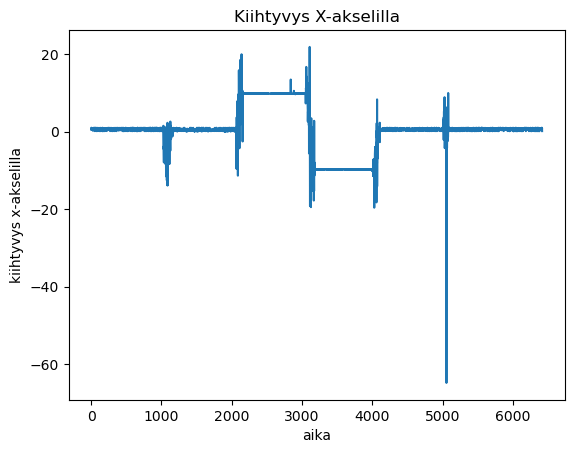

In [5]:
df['AccX'].plot(kind='line', title='Kiihtyvys X-akselilla')
plt.xlabel('aika')
plt.ylabel('kiihtyvys x-akselilla')

plt.show()

# t2

## 11.10.2023

Tässä tehtävässä tarkoitus oli parsata meidän data. Mutta koska meidän data oli jo oikeassa muodossa, muokasin vähän Sakarin koodi joten sen avulla voisin skipata puolipisteet siinä tapauksessa että niitä löytyisi. 
                    
Sen jälkeen käytin opettajan antama koodia ja sen avulla esitin meidän datan kaaviolle.



In [6]:
import numpy as np

In [7]:
# Asetukset
infile = "linear_acceleration_xyz.csv"
outfile = "kiihtyvyysdata_parsittu.csv"

## Datan parsija

In [8]:
# Original code: Mikko Pere, Metropolia UAS
def parse_data(infile, outfile):
    
    try:
        # Open infile
        f_in = open(infile, 'r')

        # open outfile
        f_out = open(outfile, 'w')

        # Read header
        header = f_in.readline()

        # Header includes Magn?
        if "Magn" in header: # IMU-9
            new_header = 'Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ\n'
        else: # IMU-6
            new_header = 'Timestamp,X,Y,Z,GyroX,GyroY,GyroZ\n'

        # Write new header
        f_out.write(new_header)

        # Change every second comma to decimal point
        line = f_in.readline() #tMeidän data on oikeassa muodossa, sitä tartte parsata.
        while line != '':
            line_out = ''
            for char in line:
                if char == ';':  # Skips any semicolons
                    continue
                else:
                    line_out = line_out + char

            f_out.write(line_out)    
            line = f_in.readline()

        # Close and save files
        f_in.close()
        f_out.close()
        
        return True
    
    except:
        print('Exception occured.')
        return False

      Time         X         Y         Z  GyroX  GyroY  GyroZ
819  16.42 -0.052644  9.825280  0.526440    NaN    NaN    NaN
820  16.44  0.047858  9.629062  0.260827    NaN    NaN    NaN
821  16.46  0.148360  9.743921  0.064609    NaN    NaN    NaN
822  16.48 -0.088538  9.657777  0.531226    NaN    NaN    NaN
823  16.50 -0.361329  9.782208  0.856661    NaN    NaN    NaN


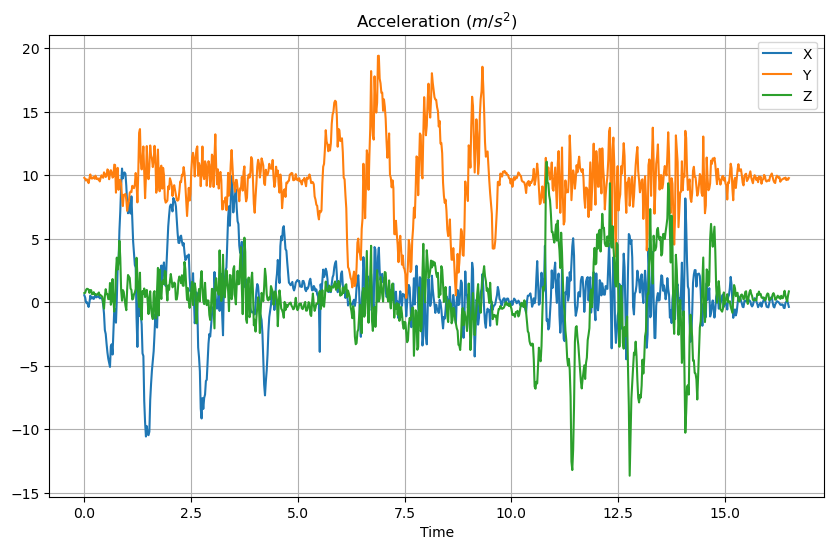

In [9]:
# Increase the display with for printing pandas dataframe
pd.set_option('display.width', 120)

# Plot data if parsing was successful
if parse_data(infile, outfile):
    
    # Read data
    df = pd.read_csv(outfile)
    
    # Rename Timestamp to Time
    df.rename(columns = {'Timestamp': 'Time'}, inplace = True)
    
    # Change to seconds
    df['Time'] = (df['Time'] - df['Time'][0])/1000
    
    # Print first 5 rows
    print(df.tail())
    
    # Plot acceleration data
    df.plot(x = 'Time', y= ['X', 'Y', 'Z'], figsize = (10, 6))
    plt.grid(True)
    plt.title('Acceleration $(m/s^2)$')
    plt.show()
    

# t3

## 11.10.2023

Tässä tehtävässä vaihdan Timestamp-sarake DataFramen indeksisarakkeeksi, muutan aikaleimat sekunneiksi, tulostan 10 ensimmäistä riviä, käytän "describe" metodia tulostamaan yleistietoja datasta ja muutan DataFrame numpy arrayksi (muutajan nimi on "numpy_array").
Luon myös uuden csv tiedoston uudella indeksilla.

In [10]:

# Step 1: Loads the CSV file into a DataFrame
df = pd.read_csv('kiihtyvyysdata_parsittu.csv')
print(df.head(10))



# Step 2: Changes the 'Timestamp' column to the DataFrame index column
df.set_index('Timestamp', inplace=True)

# Step 3: Changes the timestamps from milliseconds to seconds
df.index = df.index / 1000

# Step 4: Prints the first 10 rows of the data
print(df.head(10))

# Step 5: Prints the general information of the data using the describe method
print(df.describe())

# Step 6: Converts the DataFrame to a numpy array and save to a new variable
numpy_array = df.to_numpy()
#print(numpy_array)

# Saves the updated DataFrame to a new CSV file
df.to_csv('newindex.csv')


   Timestamp         X          Y         Z  GyroX  GyroY  GyroZ
0     719320  0.552762   9.803744  0.722658    NaN    NaN    NaN
1     719340  0.373294   9.722385  0.746587    NaN    NaN    NaN
2     719360 -0.021536   9.588383  0.969128    NaN    NaN    NaN
3     719380  0.016750   9.681706  1.060058    NaN    NaN    NaN
4     719400 -0.162718   9.590775  1.052880    NaN    NaN    NaN
5     719420 -0.368508   9.387379  0.990664    NaN    NaN    NaN
6     719440 -0.007179   9.770244  0.741802    NaN    NaN    NaN
7     719460  0.526440  10.071750  0.959556    NaN    NaN    NaN
8     719480  0.308685   9.779816  0.954770    NaN    NaN    NaN
9     719500  0.301506   9.743921  0.634121    NaN    NaN    NaN
                  X          Y         Z  GyroX  GyroY  GyroZ
Timestamp                                                    
719.32     0.552762   9.803744  0.722658    NaN    NaN    NaN
719.34     0.373294   9.722385  0.746587    NaN    NaN    NaN
719.36    -0.021536   9.588383  0.969

# t4

## 11.10.2023

Tässä tehtävässä aloitan vaihtamalla akseleiden muuttajat acc_x/y/z.ksi ja sen jälkeen piirrän niiden kuvaajat.

Kun sain tämän tehty valitsin indeksivälejä joissa akselit olisivat kohtisuorassa maahan nähden.
Koska z-akselilla ei ollut monia arvoja, jotka vastasivat painovoiman kiihtyvyyttä, minun oli laajennettava hakualuetta. ``mask_z = (acc_z.abs() > 8.7) & (acc_z.abs() < 10.9)``

Tälle datalle antoi uusia muuttajia: (acc_x, acc_y ja acc_z).

Tämän jälkeen laskin osadatoille minimiarvo, maksimiarvo, keskiarvo ja keskihajonta.

Olen arvioinut omat tulokset Markdown solussa.

Lopuksi Piirsin acc_x, acc_t ja acc_z kuvaajat.

In [11]:

df = pd.read_csv('linear_acceleration_xyz.csv')
print(df.head())

acc_x = df['x']
acc_y = df['y']
acc_z = df['z']

#print(df.head())
#acc_x.head()

   timestamp         x         y         z
0     719320  0.552762  9.803744  0.722658
1     719340  0.373294  9.722385  0.746587
2     719360 -0.021536  9.588383  0.969128
3     719380  0.016750  9.681706  1.060058
4     719400 -0.162718  9.590775  1.052880


In [12]:
# Create boolean masks for each axis
mask_x = (acc_x.abs() > 8.7) & (acc_x.abs() < 10.9)
mask_y = (acc_y.abs() > 8.7) & (acc_y.abs() < 10.9)
mask_z = (acc_z.abs() > 8.7) & (acc_z.abs() < 10.9)

# Apply the masks to the respective Series to create new Series with filtered values
acc_x_osa = acc_x[mask_x]
acc_y_osa = acc_y[mask_y]
acc_z_osa = acc_z[mask_z]

#print(acc_x_osa.head())
#print(acc_y_osa.head())
#print(acc_z_osa.head())


max_x = np.max(acc_x_osa)
min_x = np.min(acc_x_osa)
mean_x = np.mean(acc_x_osa)
std_dev_x = np.std(acc_x_osa)

print(f'max value of x: {max_x}, min value of x: {min_x}, mean for x: {mean_x}, standar deviation for x: {std_dev_x}')

max_y = np.max(acc_y_osa)
min_y = np.min(acc_y_osa)
mean_y = np.mean(acc_y_osa)
std_dev_y = np.std(acc_y_osa)

print(f'max value of y: {max_y}, min value of y: {min_y}, mean for y: {mean_y}, standar deviation for y: {std_dev_y}')

max_z = np.max(acc_z_osa)
min_z = np.min(acc_z_osa)
mean_z = np.mean(acc_z_osa)
std_dev_z = np.std(acc_z_osa)

print(f'max value of z: {max_z}, min value of z: {min_z}, mean for z: {mean_z}, standar deviation for z: {std_dev_z}')


max value of x: 10.5359745, min value of x: -10.5766535, mean for x: 1.5867795294117646, standar deviation for x: 9.713537300232943
max value of y: 10.899696, min value of y: 8.700614, mean for y: 9.767532511467891, standar deviation for y: 0.5167369544347846
max value of z: 9.444808, min value of z: -10.5766535, mean for z: 3.6324343571428566, standar deviation for z: 8.895436056069599


## Arviointi:

Omasta mielestäni arvot Y-akselilla tasmaavat suunnilleen g-voiman arvoon (9,82 m/s^2). Voidaan nähdä tämän sen keskiarvosta joka on: 9.767532511467891
Tämä johtuu siitä, että mittausten aikana anturi oli koko ajan suunnattu samaan suuntaan (y-akseli kohtisuoraan maahan nähden). 
Muilla akseleilla (x, z) saavutetaan negatiivisia arvoja, eli myös g-vastavoiman arvot.





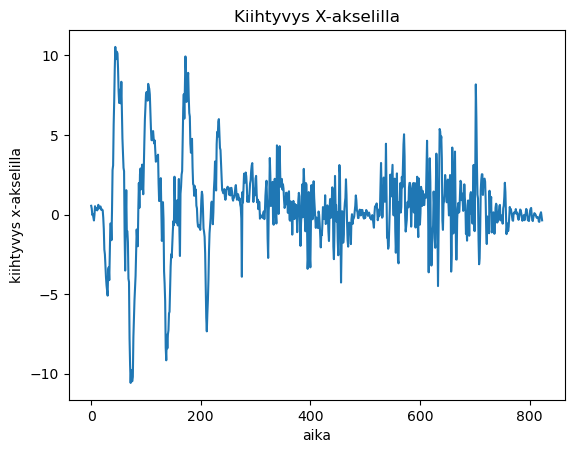

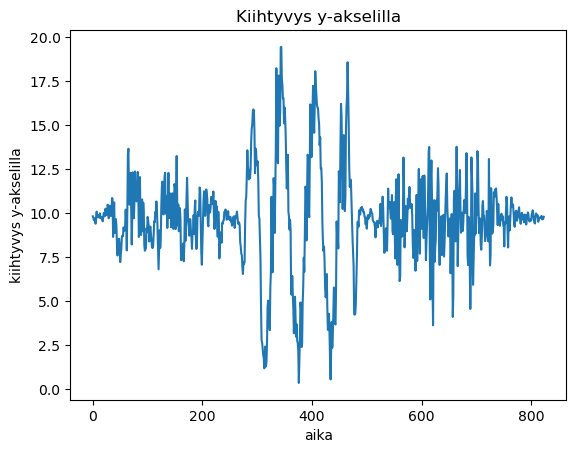

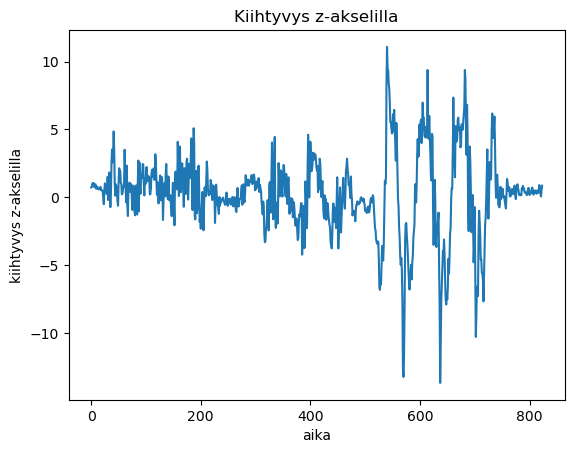

In [13]:
acc_x.plot(kind='line', title='Kiihtyvys X-akselilla')
plt.xlabel('aika')
plt.ylabel('kiihtyvys x-akselilla')
plt.show()

acc_y.plot(kind='line', title='Kiihtyvys y-akselilla')
plt.xlabel('aika')
plt.ylabel('kiihtyvys y-akselilla')
plt.show()

acc_z.plot(kind='line', title='Kiihtyvys z-akselilla')
plt.xlabel('aika')
plt.ylabel('kiihtyvys z-akselilla')
plt.show()